# Test Trialing

In [1]:
#Tratar dataframes
import pandas as pd 
#Gráficas
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Poniendo un tope de 50 filas como máximo para poder vizualizar el dataframe
pd.set_option('display.max_rows',50)

In [3]:
datos = pd.read_csv('reto_trialing.csv')
datos.head(10)

,trial_id,acronym,sponsor,hospital
0,NaN,ALINA,Hoffmann-La Roche,"Hospital Universitario 12 De Octubre, Madrid"
1,154.0,TRIDENT-1,"Turning Point Therapeutics, Inc.","Clinica Universidad De Navarra, Pamplona/Iruña"
2,172.0,XL184-021,Exelixis,"Instituto Oncológico Rosell, Barcelona"
3,945.0,1948-CL-0101,Astellas,"Hospital De La Santa Creu i Sant Pau, Barcelona"
4,915.0,NADIM-ADJUVANT,Grupo Español de Cáncer de Pulmón,"Hospital Materno-Infantil Del H.U. De Jaen, Jaén"
5,908.0,ZEAL-1L,GlaxoSmithKline,"Clinica Universidad De Navarra, Pamplona/Iruña"
6,945.0,1948-CL-0101,Astellas,"Hospital Clinico Universitario De Valencia, Va..."
7,553.0,Chemoprotection,"Aileron Therapeutics, Inc.","Hospital Universitario Clinico San Carlos, Madrid"
8,423.0,SAVANNAH,ASTRAZENECA,"Hospital Universitario 12 De Octubre, Madrid"
9,1035.0,GCT1042-01,Genmab,"Hospital Universitario Hm Sanchinarro, Madrid"


In [4]:
#Dimensión del dataframe
datos.shape

(3591, 4)

In [5]:
#Tipo de varibles por atributro
datos.dtypes

trial_id    float64
acronym      object
sponsor      object
hospital     object
dtype: object

In [6]:
#Cambiando solo la primera letra de las etiquetas de los atributos a mayúscula
datos.columns=datos.columns.str.title()

In [7]:
#Cambiando el tipo de variable de Id a integer y los Id no definidos se les asigna como 0 
datos['Trial_Id']=datos.Trial_Id.apply(lambda x: int(x) if x==x else 0)

In [8]:
datos.head()

,Trial_Id,Acronym,Sponsor,Hospital
0,0,ALINA,Hoffmann-La Roche,"Hospital Universitario 12 De Octubre, Madrid"
1,154,TRIDENT-1,"Turning Point Therapeutics, Inc.","Clinica Universidad De Navarra, Pamplona/Iruña"
2,172,XL184-021,Exelixis,"Instituto Oncológico Rosell, Barcelona"
3,945,1948-CL-0101,Astellas,"Hospital De La Santa Creu i Sant Pau, Barcelona"
4,915,NADIM-ADJUVANT,Grupo Español de Cáncer de Pulmón,"Hospital Materno-Infantil Del H.U. De Jaen, Jaén"


In [9]:
#Añadiendo la columna Ciudad a partir de la información del Hospital
datos['Ciudad']=datos.Hospital.str.split(', ').str[1]
#Eliminando la información de la ciudad en el atributo Hospital
datos['Hospital']=datos.Hospital.str.split(',').str[0]

In [10]:
#En los nombres de los hospitales, se edita  "De " y "Del "  a minúscula
datos['Hospital']=datos.Hospital.str.replace('De ','de ')
datos['Hospital']=datos.Hospital.str.replace('Del ','del ')

In [11]:
#Viendo en los nombres de ciudades donde aparece "/"
datos[datos.Ciudad.str.contains('/')==True]

,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
1,154,TRIDENT-1,"Turning Point Therapeutics, Inc.",Clinica Universidad de Navarra,Pamplona/Iruña
5,908,ZEAL-1L,GlaxoSmithKline,Clinica Universidad de Navarra,Pamplona/Iruña
21,172,XL184-021,Exelixis,Clinica Universidad de Navarra,Pamplona/Iruña
24,0,NP41300,Hoffmann-La Roche,Clinica Universidad de Navarra,Pamplona/Iruña
45,0,TROPION-Lung05,AstraZeneca,Hospital General Universitario de Alicante,Alicante/Alacant
...,...,...,...,...,...
3491,1531,MARIPOSA-2,JANSSEN,Clinica Universidad de Navarra,Pamplona/Iruña
3510,184,CK-301-101,"Checkpoint Therapeutics, Inc.",Clinica Universidad de Navarra,Pamplona/Iruña
3534,0,MERMAID-1,AstraZeneca,Clinica Universidad de Navarra,Pamplona/Iruña
3547,377,NP40435,HOFFMANN-LA ROCHE,Clinica Universidad de Navarra,Pamplona/Iruña


In [12]:
#Para uniformizar la información, nos quedamos con el nombre de la ciudad en castellano 
datos['Ciudad']=datos.Ciudad.str.split("/").str[0]

In [13]:
datos.head()

,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
0,0,ALINA,Hoffmann-La Roche,Hospital Universitario 12 de Octubre,Madrid
1,154,TRIDENT-1,"Turning Point Therapeutics, Inc.",Clinica Universidad de Navarra,Pamplona
2,172,XL184-021,Exelixis,Instituto Oncológico Rosell,Barcelona
3,945,1948-CL-0101,Astellas,Hospital de La Santa Creu i Sant Pau,Barcelona
4,915,NADIM-ADJUVANT,Grupo Español de Cáncer de Pulmón,Hospital Materno-Infantil del H.U. de Jaen,Jaén


In [14]:
#Chequeando los extremos de los Id
print("Id mínimo: {0}\nId máximo: {1}".format(datos.Trial_Id.min(),datos.Trial_Id.max()))

Id mínimo: 0
Id máximo: 1887


In [15]:
datos[datos.Trial_Id==6]

,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
535,6,CLGK974X2101,Novartis Pharmaceuticals,Hospital General Universitario Gregorio Marañon,Madrid
1911,6,CLGK974X2101,Novartis Pharmaceuticals,Hospital Universitari Vall D'Hebron,Barcelona
2288,6,CLGK974X2101,Novartis Pharmaceuticals,ICO (Institut Catala D'Oncologia) - Hospital D...,L' Hospitalet de Llobregat
2717,6,CLGK974X2101,Novartis Pharmaceuticals,Hospital Clinico Universitario de Valencia,València


In [16]:
datos[datos.Trial_Id==1887]

,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
2485,1887,ACE-Pan Tumor-02,"Ambrx, Inc.",Hospital Universitari Arnau de Vilanova de Lleida,Lleida


In [17]:
#Chequeando las filas duplicadas
datos[datos.duplicated(datos.columns)]

,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
32,1035,GCT1042-01,Genmab,Hospital Universitario Fundacion Jimenez Diaz,Madrid
53,0,TROPION-Lung05,AstraZeneca,Hospital General Universitario de Alicante,Alicante
62,1035,GCT1042-01,Genmab,Hospital Universitario Fundacion Jimenez Diaz,Madrid
70,1032,CDKY709A12101C,Novartis Pharmaceuticals,Hospital Universitari Vall D'Hebron,Barcelona
78,1865,ACT16849,Sanofi,Hospital Universitari Vall D'Hebron,Barcelona
...,...,...,...,...,...
3584,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
3585,485,M19-037,AbbVie,Hospital Universitario Regional de Malaga,Málaga
3586,296,LAURA,ASTRAZENECA,Hospital Universitario Regional de Malaga,Málaga
3589,916,Neo-DIANA,Grupo Español de Cáncer de Pulmón,Hospital Universitario Cruces,Barakaldo


In [18]:
#Chequear el número de veces que aparece el Id interno
conteo_duplicados=datos.Trial_Id.value_counts()
cd_mas1 =conteo_duplicados[conteo_duplicados!=1]
print("Nro total de Ids que se repiten más de una vez: %d" % len(cd_mas1))
cd_mas1


Nro total de Ids que se repiten más de una vez: 214


0       749
172     207
184     104
92       70
168      62
       ... 
20        2
888       2
1071      2
1113      2
108       2
Name: Trial_Id, Length: 214, dtype: int64

In [19]:
cd_1=conteo_duplicados[conteo_duplicados==1]
print("Nro total de Ids que solo se repite una vez: %d" % len(cd_1))
cd_1

Nro total de Ids que solo se repite una vez: 15


713     1
1845    1
106     1
627     1
1769    1
257     1
164     1
185     1
949     1
1763    1
186     1
1868    1
1509    1
530     1
1887    1
Name: Trial_Id, dtype: int64

In [20]:
#Viendo los valores que no están incluidos entre el máximo y mínimo Id
lista=[]
for i in range(6,1888):
    if not i in datos.Trial_Id.to_list():
        lista.append(i)
if len(lista)==0:
    print("Los Ids son continuos")
else: 
    print("Número total de Id no incluidos entre 6 y 1887: %d\n" % len(lista))
    print(lista)

Número total de Id no incluidos entre 6 y 1887: 1654

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 158, 159, 161, 163, 165, 167, 171, 173, 176, 178, 180, 181, 182, 183, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 218, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 256,

In [21]:
#Número de datos nulos
datos.isnull().sum()

Trial_Id     0
Acronym      2
Sponsor     70
Hospital    11
Ciudad      11
dtype: int64

In [22]:
#En este caso, vemos los Id asignados a 0 que son indefinidos
print(datos[datos.Trial_Id==0].shape)
datos[datos.Trial_Id==0]

(749, 5)


,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
0,0,ALINA,Hoffmann-La Roche,Hospital Universitario 12 de Octubre,Madrid
22,0,TROPION-LUNG01,AstraZeneca,Hospital Universitario Regional de Malaga,Málaga
24,0,NP41300,Hoffmann-La Roche,Clinica Universidad de Navarra,Pamplona
33,0,Morpheus Lung,Hoffmann-La Roche,Hospital Universitario Hm Sanchinarro,Madrid
37,0,CR108656,Janssen,Instituto Oncológico Rosell,Barcelona
...,...,...,...,...,...
3563,0,IMbrella A,Hoffmann-La Roche,Complejo Hospitalario Universitario Insular de...,Las Palmas de Gran Canaria
3574,0,MAGELLAN,AstraZeneca,Hospital Universitario Virgen del Rocio,Sevilla
3576,0,TROPION-Lung05,AstraZeneca,Hospital Universitario Puerta de Hierro Majada...,Majadahonda
3577,0,TROPION-Lung05,AstraZeneca,Hospital Clinic de Barcelona,Barcelona


In [23]:
print(datos[datos.Acronym.isnull()].shape)
datos[datos.Acronym.isnull()]

(2, 5)


,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
496,198,NaN,"Daiichi Sankyo, Inc.",Hospital Universitari Vall D'Hebron,Barcelona
1057,198,NaN,"Daiichi Sankyo, Inc.",Hospital Universitario 12 de Octubre,Madrid


In [24]:
print(datos[datos.Hospital.isnull()].shape)
datos[datos.Hospital.isnull()]

(11, 5)


,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
106,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
312,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
360,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
430,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
566,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
2219,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
2553,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
2575,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
3056,928,U31402-A-U201,"Daiichi Sankyo, Inc.",NaN,NaN
3469,282,innovaTV 207,Seagen Inc.,NaN,NaN


Solamente en el Id 928, los Hospitales son desconocidos.

In [25]:
print(datos[datos.Sponsor.isnull()].shape)
datos[datos.Sponsor.isnull()]

(70, 5)


,Trial_Id,Acronym,Sponsor,Hospital,Ciudad
152,92,GO30103,NaN,Hospital General Universitario de Alicante,Alicante
171,92,GO30103,NaN,Clinica Universidad de Navarra,Pamplona
185,92,GO30103,NaN,Hospital Universitario Clinico San Carlos,Madrid
245,92,GO30103,NaN,Hospital Universitari Vall D'Hebron,Barcelona
249,92,GO30103,NaN,Clinica Universidad de Navarra,Pamplona
...,...,...,...,...,...
3455,92,GO30103,NaN,Hospital del Mar,Barcelona
3459,92,GO30103,NaN,Hospital Universitario Hm Sanchinarro,Madrid
3480,92,GO30103,NaN,Hospital Clinico Universitario de Valencia,València
3497,92,GO30103,NaN,Hospital Universitari Vall D'Hebron,Barcelona


Solamente en el Id 92, no se especifica el sponsor.
<br>

# Gráficos por atributos

###  Id en función de los ensayos clínicos

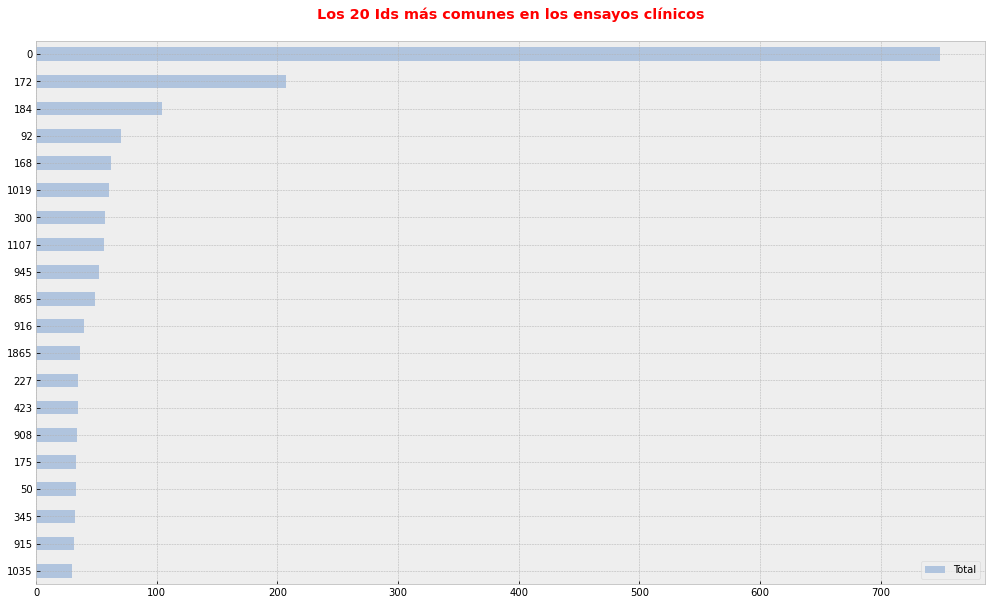

In [26]:
total_Id=datos[['Trial_Id']].groupby(by='Trial_Id').agg(Total=("Trial_Id",'count'))
total_Id.sort_values("Total").tail(20).plot.barh(figsize=(17,10),color='lightsteelblue')
plt.title("Los 20 Ids más comunes en los ensayos clínicos\n",color= 'red',fontweight= 'bold')
plt.ylabel("")
plt.savefig('Id.png')
plt.show()

### Ensayos en función del número de aplicaciones hechos

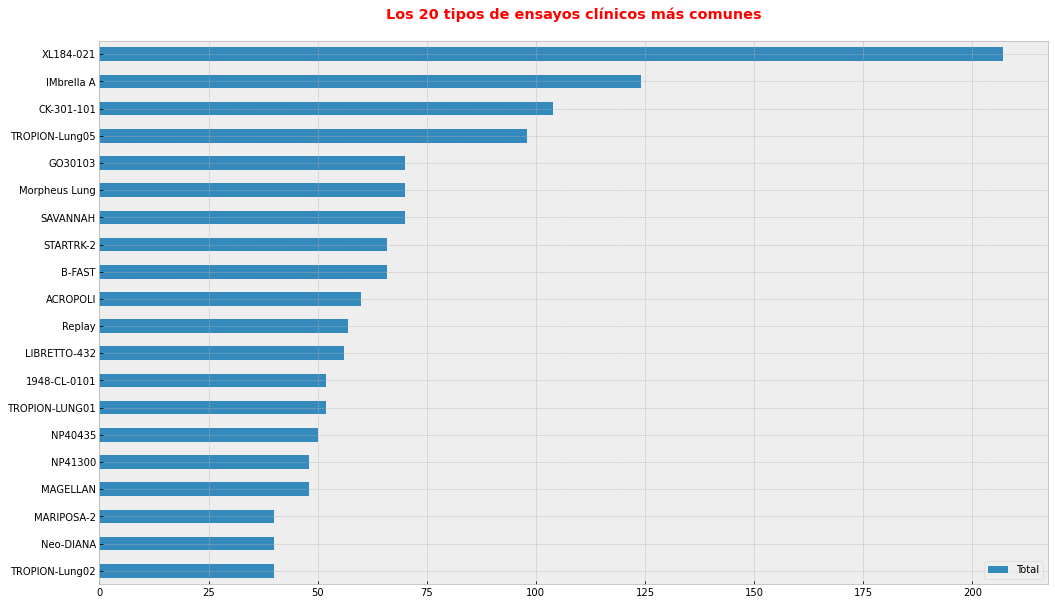

In [27]:
total_Acronym=datos[['Trial_Id','Acronym']].groupby(by='Acronym').agg(Total=("Trial_Id",'count'))
total_Acronym.sort_values("Total").tail(20).plot.barh(figsize=(17,10))
plt.title("Los 20 tipos de ensayos clínicos más comunes\n",color= 'red',fontweight= 'bold')
plt.ylabel("")
plt.savefig('Ensayos.png')
plt.show()

### Sponsor con mayor protagonismo

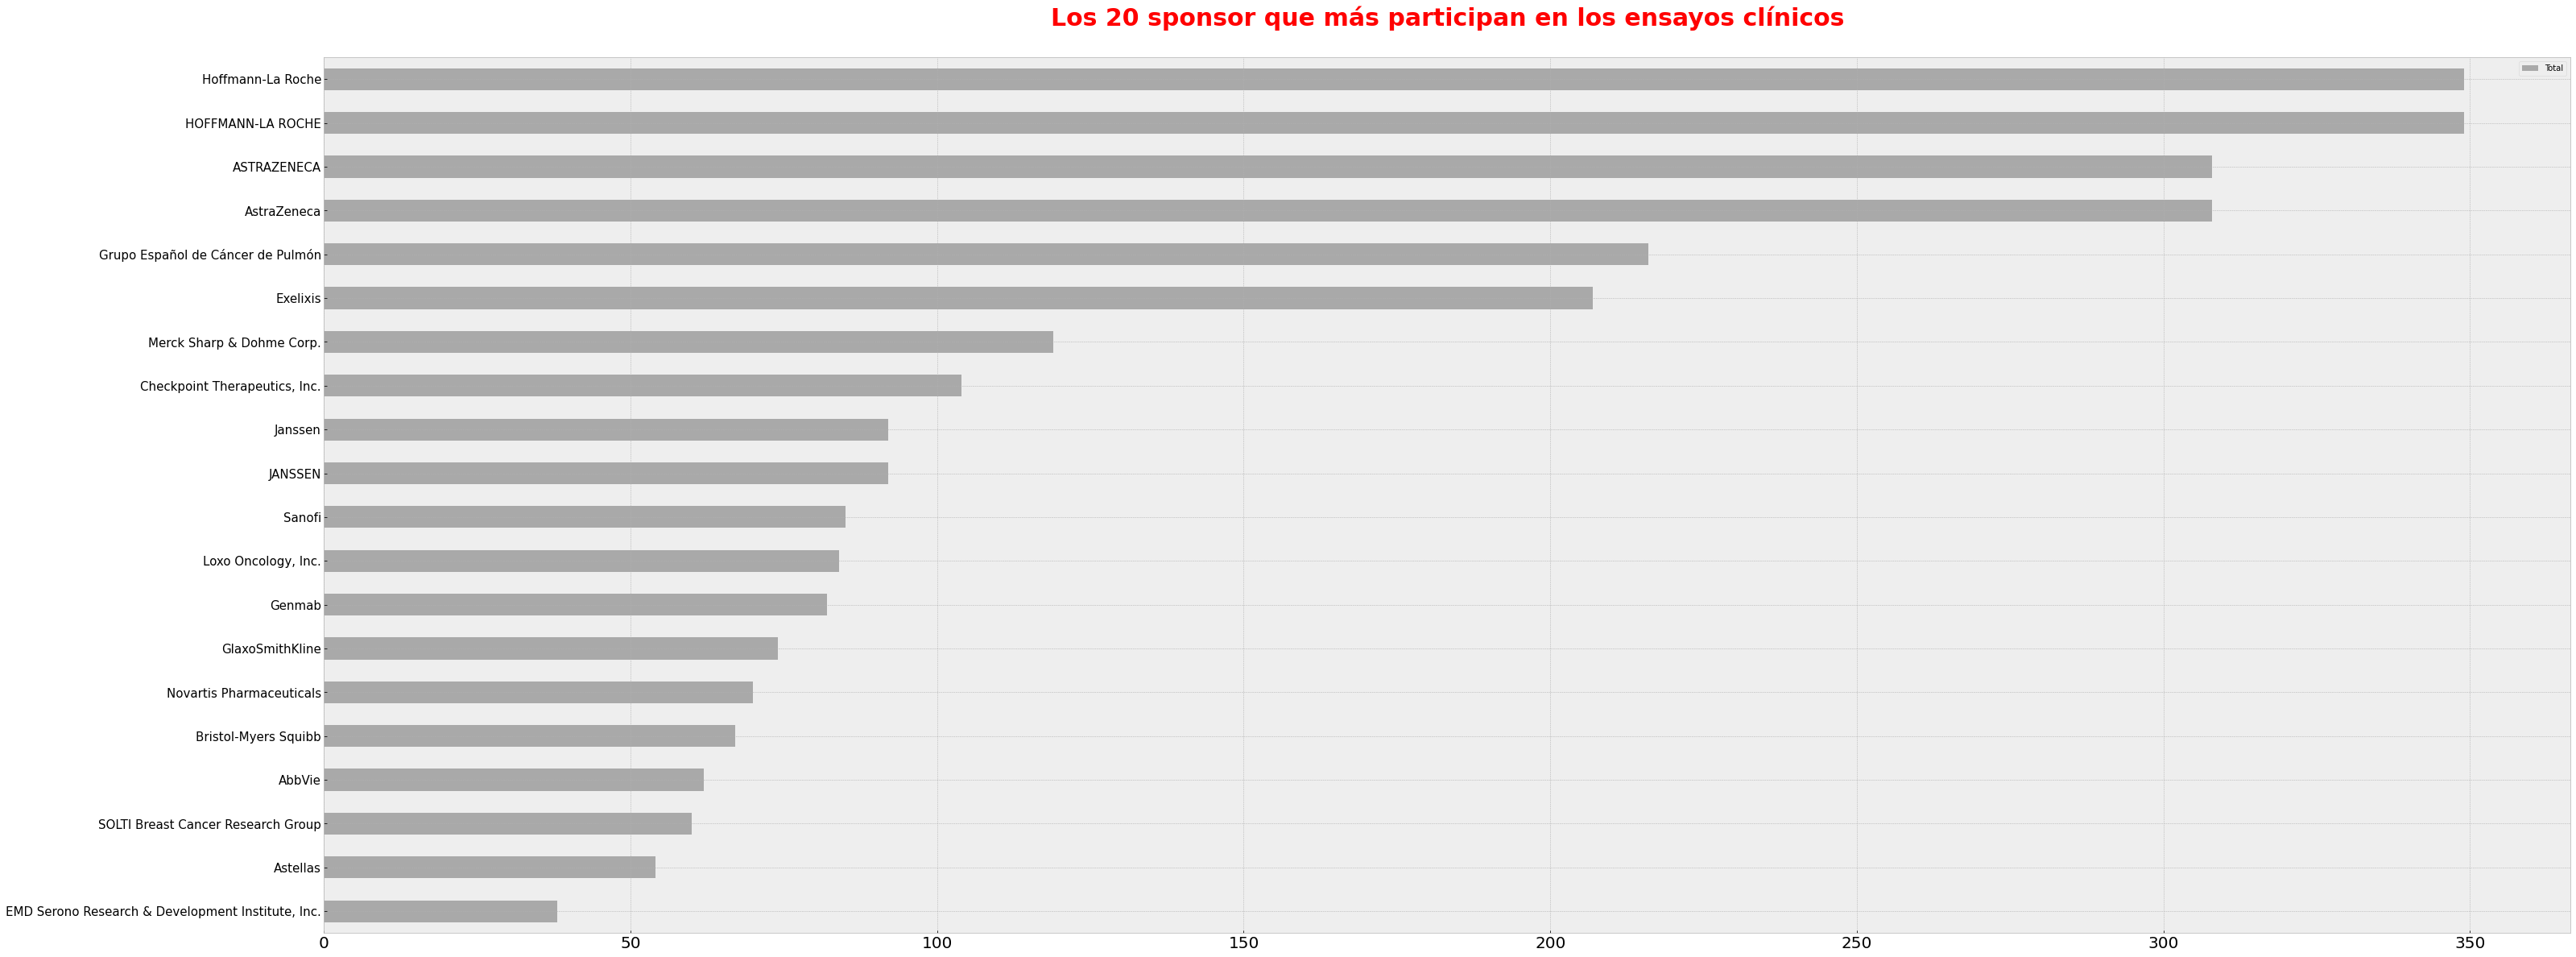

In [28]:
total_Sponsor=datos[['Trial_Id','Sponsor']].groupby(by='Sponsor').agg(Total=("Trial_Id",'count'))
total_Sponsor.sort_values("Total").tail(20).plot.barh(figsize=(50,20),color='darkgrey')
plt.title("Los 20 sponsor que más participan en los ensayos clínicos\n",
          color= 'red',fontweight= 'bold',fontsize=30)
plt.ylabel("")
plt.yticks(fontsize=15)
plt.xticks(fontsize=20)
plt.savefig('Sponsor.png')
plt.show()

### Hospitales en función  del número de ensayos clínicos

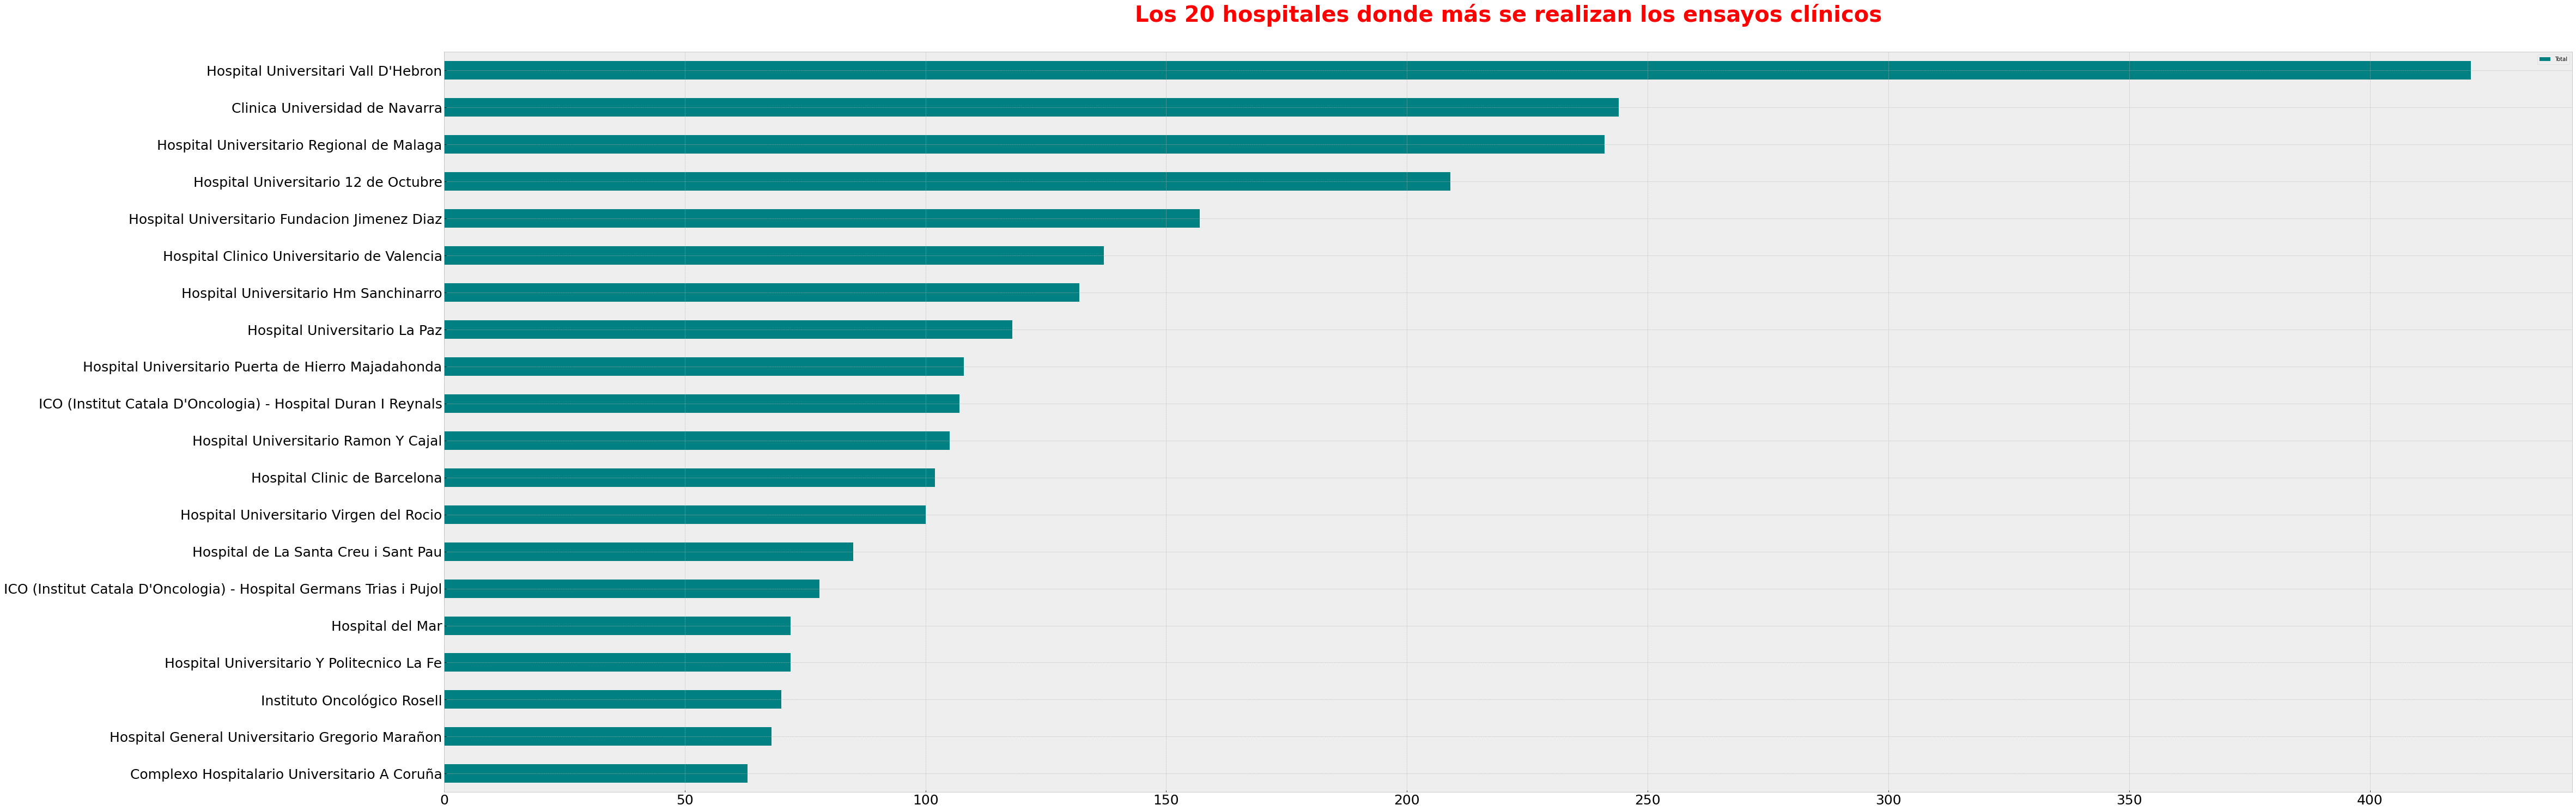

In [29]:
total_Hospital=datos[['Trial_Id','Hospital']].groupby(by='Hospital').agg(Total=("Trial_Id",'count'))
total_Hospital.sort_values("Total").tail(20).plot.barh(figsize=(70,25),color='teal')
plt.title("Los 20 hospitales donde más se realizan los ensayos clínicos\n",
          color= 'red',fontweight= 'bold', fontsize=40)
plt.ylabel("")
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig('Hospitales.png')
plt.show()

### Hospitales en función  de los tipos de ensayos clínicos realizados

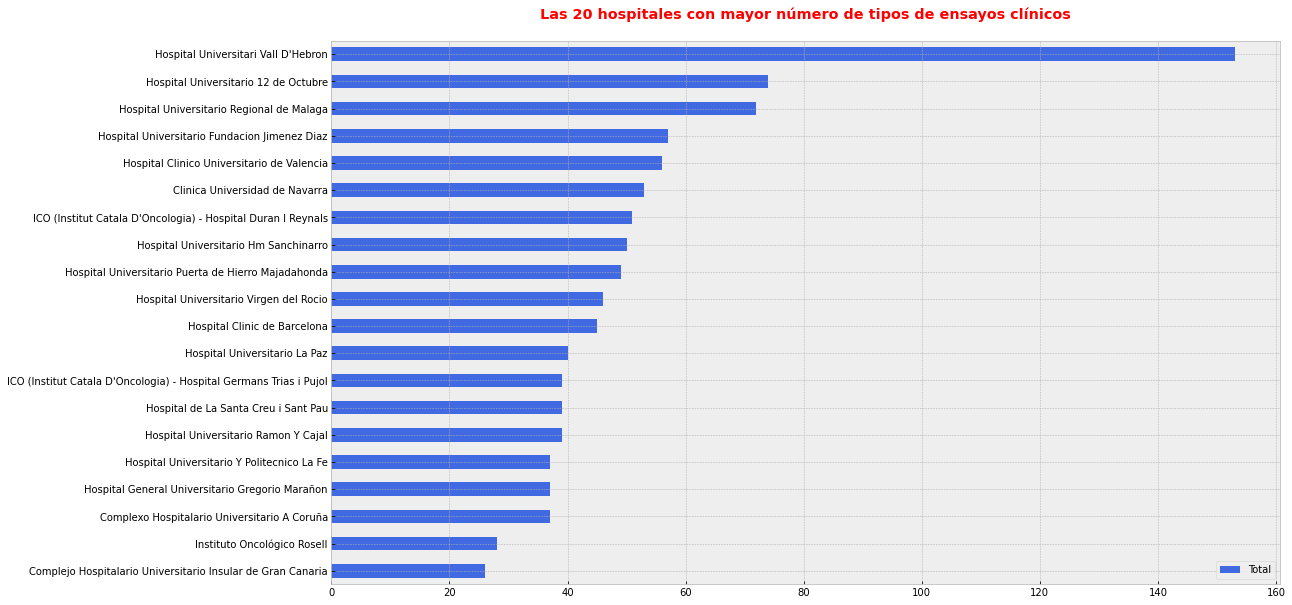

In [30]:
hospitales_Ensayos=datos[['Hospital','Acronym']].drop_duplicates()
hospitales_Ensayos=hospitales_Ensayos.groupby(by='Hospital').agg(Total=("Acronym",'count'))
hospitales_Ensayos.sort_values("Total").tail(20).plot.barh(figsize=(17,10),color='royalblue')
plt.title("Las 20 hospitales con mayor número de tipos de ensayos clínicos\n",color= 'red',fontweight= 'bold')
plt.ylabel("")
plt.savefig('hospitales_Ensayo.png')
plt.show()

### Ciudades en función  del número de ensayos clínicos

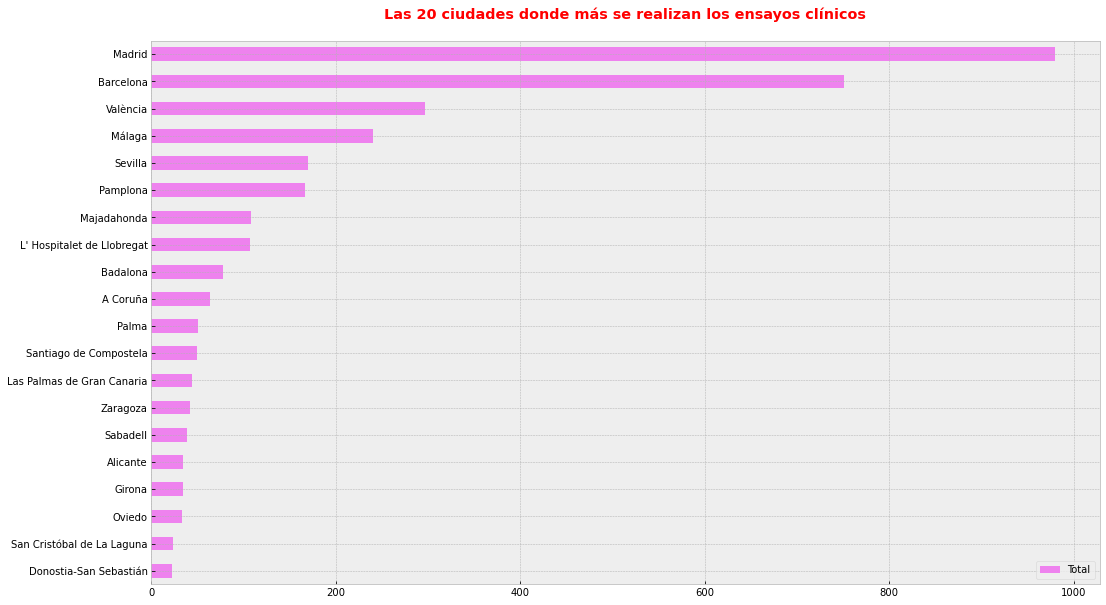

In [31]:
total_Ciudad=datos[['Trial_Id','Ciudad']].groupby(by='Ciudad').agg(Total=("Trial_Id",'count'))
total_Ciudad.sort_values("Total").tail(20).plot.barh(figsize=(17,10),color='violet')
plt.title("Las 20 ciudades donde más se realizan los ensayos clínicos\n",color= 'red',fontweight= 'bold')
plt.ylabel("")
plt.savefig('Ciudades.png')
plt.show()

### Ciudades en función del número de hospitales

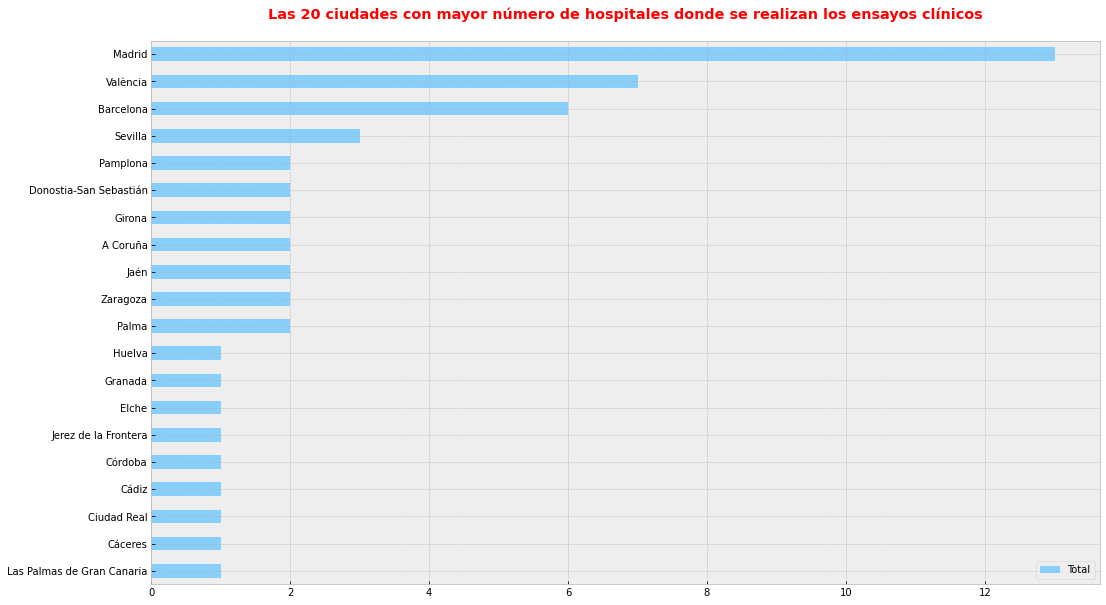

In [32]:
hospitales_Ciudad=datos[['Hospital','Ciudad']].drop_duplicates()
hospitales_Ciudad=hospitales_Ciudad.groupby(by='Ciudad').agg(Total=("Hospital",'count'))
hospitales_Ciudad.sort_values("Total").tail(20).plot.barh(figsize=(17,10),color='lightskyblue')
plt.title("Las 20 ciudades con mayor número de hospitales donde se realizan los ensayos clínicos\n",color= 'red',fontweight= 'bold')
plt.ylabel("")
plt.savefig('hospitales_ciudad.png')
plt.show()